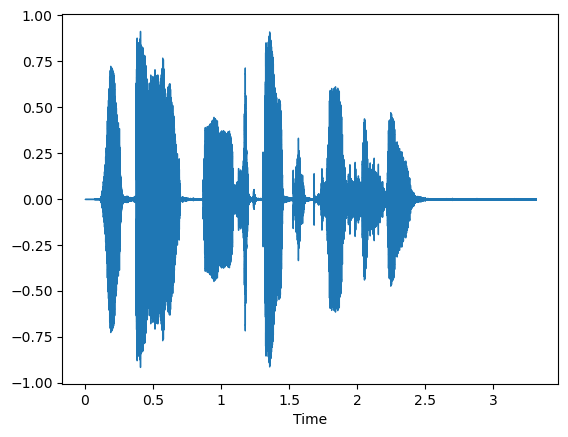

In [4]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
speech_signal , sr = librosa.load(r"C:\Users\HP\Downloads\speech processing.mp3")
librosa.display.waveshow(speech_signal)

In [5]:
Audio(data = speech_signal, rate = sr)

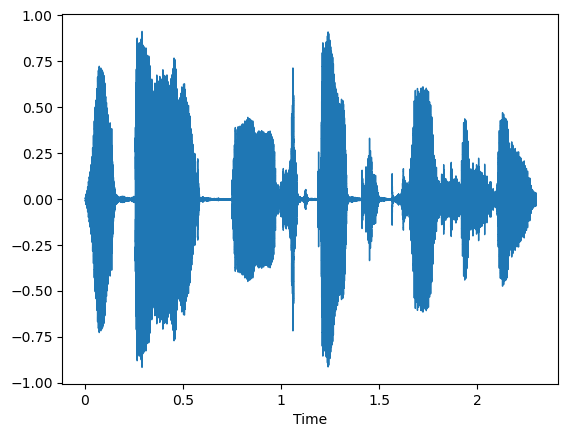

In [6]:
trimmed_signal , index = librosa.effects.trim(speech_signal, top_db = 20)
librosa.display.waveshow(trimmed_signal)

In [7]:
Audio(trimmed_signal, rate=sr)

In [8]:
print(librosa.get_duration(y=speech_signal, sr=sr), librosa.get_duration(y=trimmed_signal,sr=sr))

3.312018140589569 2.2987755102040817


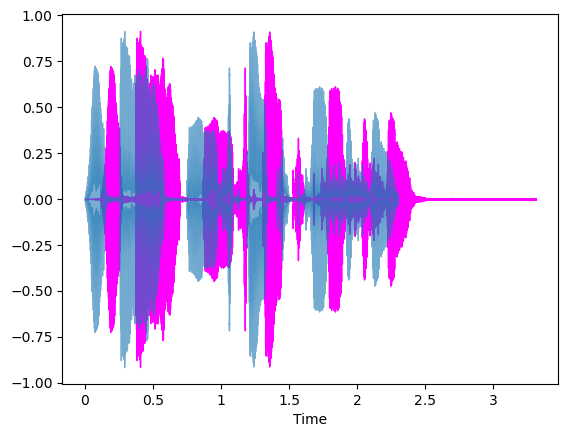

In [9]:
fig,ax = plt.subplots(nrows=1)
librosa.display.waveshow(speech_signal,label="Original_signal",color = "magenta",alpha=1)
librosa.display.waveshow(trimmed_signal,label="Trimmed_signal", alpha=0.6)

In [10]:
split_signal= librosa.effects.split(y=speech_signal,top_db=20)
print(split_signal)

[[ 2560  6656]
 [ 7680 16384]
 [18432 27136]
 [28160 33280]
 [33792 35840]
 [38400 53248]]


In [11]:
Audio(split_signal[1], rate = sr)

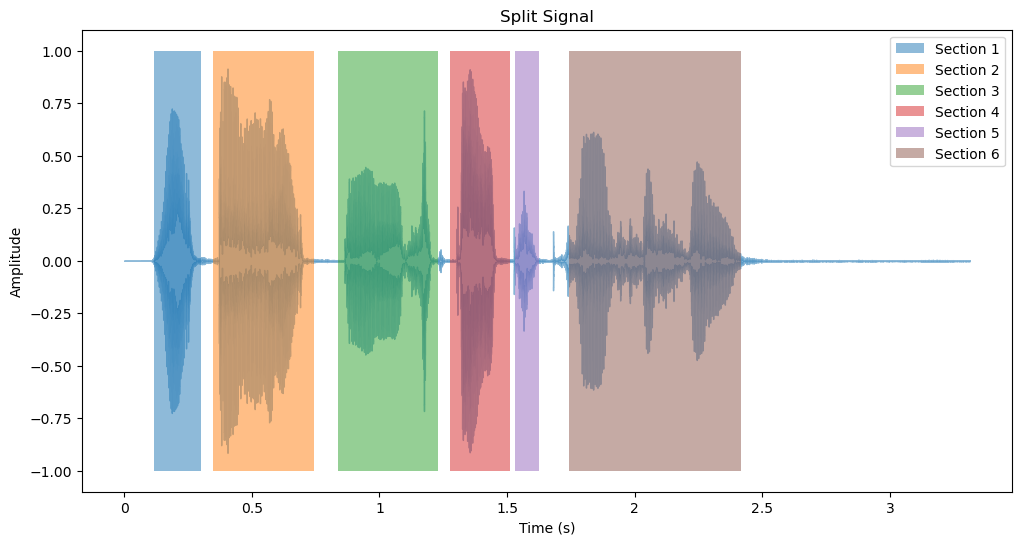

In [12]:
sections = librosa.effects.split(speech_signal, top_db=20)

# Plot the split signal
plt.figure(figsize=(12, 6))
librosa.display.waveshow(speech_signal, sr=sr, alpha=0.5)
for i, section in enumerate(sections):
    plt.fill_betweenx([-1, 1], section[0]/sr, section[1]/sr, alpha=0.5, label=f'Section {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Split Signal')
plt.legend()
plt.show()

In [24]:
import soundfile as sf 
for i, section in enumerate(sections):
    # Extract the split segment
    split_segment = speech_signal[section[0]:section[1]]
    # Save the split segment as a separate audio file
    sf.write(f'split_segment_{i}.mp3', split_segment, sr)
    # Print the file name and duration
    print(f"Split segment {i+1}: split_segment_{i}.mp3, Duration: {len(split_segment)/sr} seconds")
    Audio(f'split_segment_{i}.mp3')

Split segment 1: split_segment_0.mp3, Duration: 0.18575963718820862 seconds
Split segment 2: split_segment_1.mp3, Duration: 0.3947392290249433 seconds
Split segment 3: split_segment_2.mp3, Duration: 0.3947392290249433 seconds
Split segment 4: split_segment_3.mp3, Duration: 0.23219954648526078 seconds
Split segment 5: split_segment_4.mp3, Duration: 0.09287981859410431 seconds
Split segment 6: split_segment_5.mp3, Duration: 0.6733786848072563 seconds


In [29]:
Audio(f'split_segment_{0}.mp3')

In [30]:
Audio(f'split_segment_{1}.mp3')

In [31]:
Audio(f'split_segment_{2}.mp3')

In [32]:
Audio(f'split_segment_{3}.mp3')

In [33]:
Audio(f'split_segment_{4}.mp3')

In [34]:
Audio(f'split_segment_{5}.mp3')

COMPARISON OF RESULTS WITH IEEE PAPER:

Silence detection and removal is a critical preprocessing step in speech processing applications such as automatic speech recognition and speaker identification. While libraries like Librosa offer functions like trim to remove silence based on a threshold, this approach may not be efficient in low Signal to Noise Ratio (SNR) conditions. To address this limitation, the paper proposes an enhanced method for silence detection.

In this proposed method, the speech signal undergoes three key steps:

Continuous Average Energy Calculation: The energy of the speech signal is computed every 50 ms throughout its duration.
Normalization: The resulting energy values are normalized to obtain the signal's "envelograme," representing its energy profile over time.
Zero Crossing Method: Using the zero crossing method, the maxima and indices of lobes in the envelograme are identified, aiding in silence detection.
This method demonstrates improved accuracy compared to traditional methods and built-in functions. By leveraging continuous energy analysis and normalization, it offers a more robust approach to silence detection, particularly in challenging SNR conditions.